## Step 1 - Import data and relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_data_loc = 'data/loan_data_training.csv'
training_data = pd.read_csv(training_data_loc)

test_data_loc = 'data/loan_data_test.csv'
test_data = pd.read_csv(test_data_loc)

print('%i records in training data set' % len(training_data))
print('%i records in test data set' % len(test_data))

614 records in training data set
367 records in test data set


## Step 2 - Clean data in training set

In [3]:
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train_data_cols_with_nan_values = training_data.columns[training_data.isna().any()].tolist()
print('%i columns in training data set have NaN values' % (len(train_data_cols_with_nan_values)))
print(train_data_cols_with_nan_values)

# print('\n')

# test_data_cols_with_nan_values = test_data.columns[test_data.isna().any()].tolist()
# print('%i columns in test data set have NaN values' % (len(test_data_cols_with_nan_values)))
# print(test_data_cols_with_nan_values)

7 columns in training data set have NaN values
['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [5]:
training_data['Gender'] = training_data['Gender'].fillna(training_data.mode()['Gender'][0])
training_data['Married'] = training_data['Married'].fillna(training_data.mode()['Married'][0])
training_data['Dependents'] = training_data['Dependents'].fillna(training_data.mode()['Dependents'][0])
training_data['Self_Employed'] = training_data['Self_Employed'].fillna(training_data.mode()['Self_Employed'][0])
training_data['Loan_Amount_Term'] = training_data['Loan_Amount_Term'].fillna(training_data.mode()['Loan_Amount_Term'][0])
training_data['Credit_History'] = training_data['Credit_History'].fillna(training_data.mode()['Credit_History'][0])
training_data['LoanAmount'] = training_data['LoanAmount'].fillna(training_data['LoanAmount'].median())

In [6]:
train_data_cols_with_nan_values = training_data.columns[training_data.isna().any()].tolist()
print('%i columns in training data set have NaN values' % (len(train_data_cols_with_nan_values)))
print(train_data_cols_with_nan_values)

0 columns in training data set have NaN values
[]


## Step 3 - Visualise data to uncover patterns

In [7]:
training_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

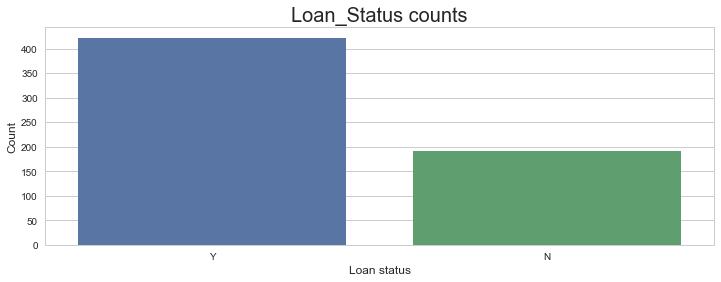

In [8]:
sns.set(style="whitegrid")
fig = plt.subplots(figsize=(12, 4))
ax = sns.countplot(x='Loan_Status', data=training_data)
plt.title('Loan_Status counts', fontsize=20)
plt.xlabel('Loan status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

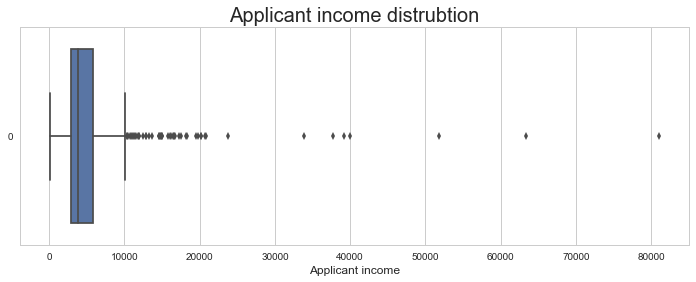

In [9]:
sns.set(style="whitegrid")
fig = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(data=training_data['ApplicantIncome'], orient='h')
plt.title('Applicant income distrubtion', fontsize=20)
plt.xlabel('Applicant income', fontsize=12)
plt.show()

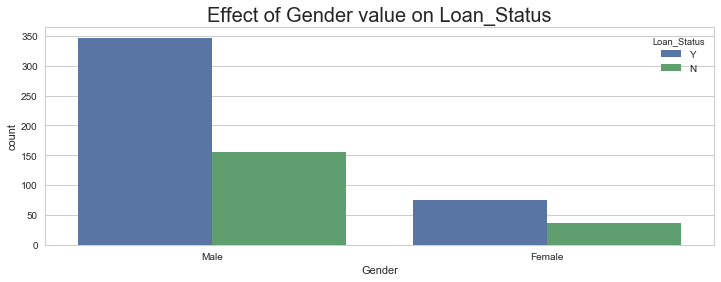

In [10]:
sns.set(style="whitegrid")
fig = plt.subplots(figsize=(12, 4))
ax = sns.countplot(x='Gender', hue='Loan_Status', data=training_data)
plt.title('Effect of Gender value on Loan_Status', fontsize=20)
plt.show()

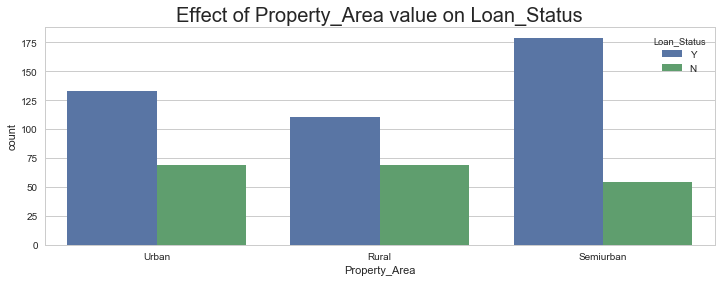

In [11]:
sns.set(style="whitegrid")
fig = plt.subplots(figsize=(12, 4))
ax = sns.countplot(x='Property_Area', hue='Loan_Status', data=training_data)
plt.title('Effect of Property_Area value on Loan_Status', fontsize=20)
plt.show()